[View in Colaboratory](https://colab.research.google.com/github/CC-MNNIT/2018-19-Classes/blob/master/MachineLearning/2018_08_27_Logical-Rhythm-3/MNIST.ipynb)

# MNIST Tutorial By [packetChor](https://github.com/packetChor) उर्फ Dipunj Gupta

1.   Download the MNIST dataset from Professor Yann Lecun's Website
2.   Create a folder called DATA
3. Extract the files (which are in idx format)



In [0]:
!wget -q -r -A '*ubyte.gz' --no-parent  'http://yann.lecun.com/exdb/mnist/'
!rm -rf DATA
!mkdir DATA
!mv yann.lecun.com/exdb/mnist/* DATA/
!rm -rf yann.lecun.com
!gunzip DATA/*

In [2]:
!ls DATA

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


To convert idx directly to an array (numpy array), use idx2numpy library, pydot,graphviz is used for visualising the model's structure

In [3]:
!pip3 install -q idx2numpy
!pip3 install -q --upgrade --force-reinstall matplotlib

tensorflow 1.10.1 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.1 which is incompatible.
tensorflow 1.10.1 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.


In [0]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X_train = idx2numpy.convert_from_file('DATA/train-images-idx3-ubyte')
Y_train = idx2numpy.convert_from_file('DATA/train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file('DATA/t10k-images-idx3-ubyte')
Y_test = idx2numpy.convert_from_file('DATA/t10k-labels-idx1-ubyte')

In [0]:
# Creating a Cross Validation Set from the training data

X_cross = X_train[50000:]
Y_cross = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [7]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 28, 28)
Y_Train (50000, 28, 28)
X_cross (10000, 28, 28)
Y_cross (10000, 28, 28)
X_Test (10000, 28, 28)
Y_Test (10000, 28, 28)


The images are stored as 2D arrays/matrix (of size 28*28) where each value represents the intensity of a pixel.

In [8]:
np.set_printoptions(linewidth=np.nan)
print(X_train[12])


# Can you see THE BIG 3 in the image below ??

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122  33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254  75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 224 254 254 153   

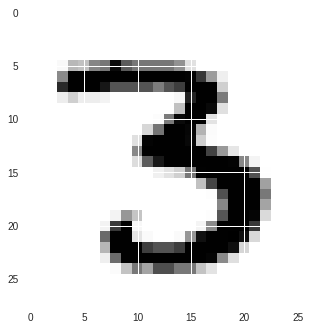

In [12]:
digit = X_train[12]
plt.imshow(digit)
plt.show()


# plt.imshow() treats 0 as brightest and 255 as darkest

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
X_train = X_train.reshape(X_train.shape[0], -1) # flattens X_train to 50,000 * (1*28*28) : Basically keeps the first dimension intact and flattens all other dimensions
X_train = X_train.astype('float32')
X_train /= 255

X_cross = X_cross.reshape(X_cross.shape[0], -1)
X_cross = X_cross.astype('float32')
X_cross /= 255

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32')
X_test /= 255


Y_train = np_utils.to_categorical(Y_train, 10)
Y_cross = np_utils.to_categorical(Y_cross, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

num_classes = Y_test.shape[1]

In [15]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 784)
Y_Train (50000, 784)
X_cross (10000, 784)
Y_cross (10000, 784)
X_Test (10000, 784)
Y_Test (10000, 784)


In [0]:
model = Sequential()

# First Hidden Layer (input layer is implicit from the input_dim)
model.add( Dense(units=100, input_shape=(28*28,), activation='relu',name='Hidden-1'))

# Second Hidden Layer
model.add( Dense(units=100, activation='relu',name='Hidden-2') )

# Output layer
model.add( Dense(units=num_classes, activation='sigmoid',name='OutputLayer') )

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# sgd stands for : stochastic gradient descent (the same gradient descent that we taught you in class)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
Hidden-2 (Dense)             (None, 100)               10100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


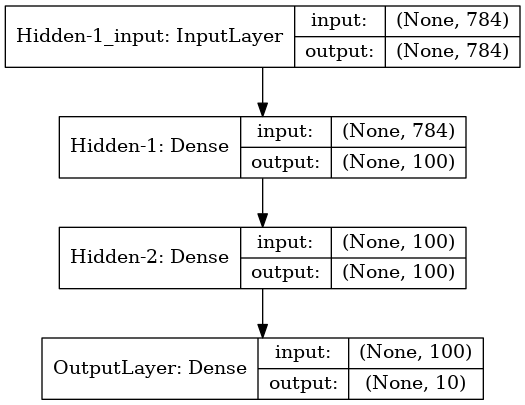

In [19]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png') 

In [20]:
history = model.fit(X_train, Y_train, validation_data=(X_cross, Y_cross), epochs=20, batch_size=200, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/step - loss: 2.1970 - acc: 0.2593 - val_loss: 2.0683 - val_acc: 0.4260
Epoch 2/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.8007 - acc: 0.5647 - val_loss: 1.3454 - val_acc: 0.7283
Epoch 3/20
50000/50000 [==============================] - 2s 31us/step - loss: 0.9836 - acc: 0.7875 - val_loss: 0.6871 - val_acc: 0.8471
Epoch 4/20
50000/50000 [==============================] - 2s 31us/step - loss: 0.6191 - acc: 0.8474 - val_loss: 0.4944 - val_acc: 0.8789
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.4940 - acc: 0.8703 - val_loss: 0.4181 - val_acc: 0.8925
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.4335 - acc: 0.8827 - val_loss: 0.3752 - val_acc: 0.8989
Epoch 7/20
50000/50000 [==============================] - 2s 31us/step - loss: 0.3978 - acc: 0.8903 - val_loss: 0.3487 - val_acc

In [21]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


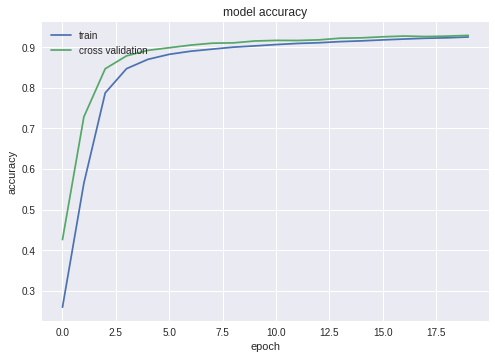

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

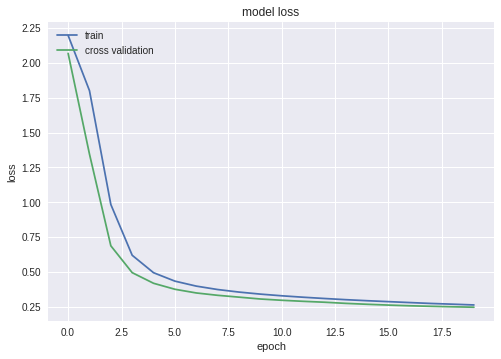

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9271


In [25]:
Y_pred = model.predict_classes(X_test,verbose=1)
Y_test = np.argmax(Y_test, axis=1) 

10000/10000 [==============================] - 0s 35us/step


In [0]:
correct_indices = list(np.where(Y_pred == Y_test)[0])
incorrect_indices = list(np.where(Y_pred != Y_test)[0])

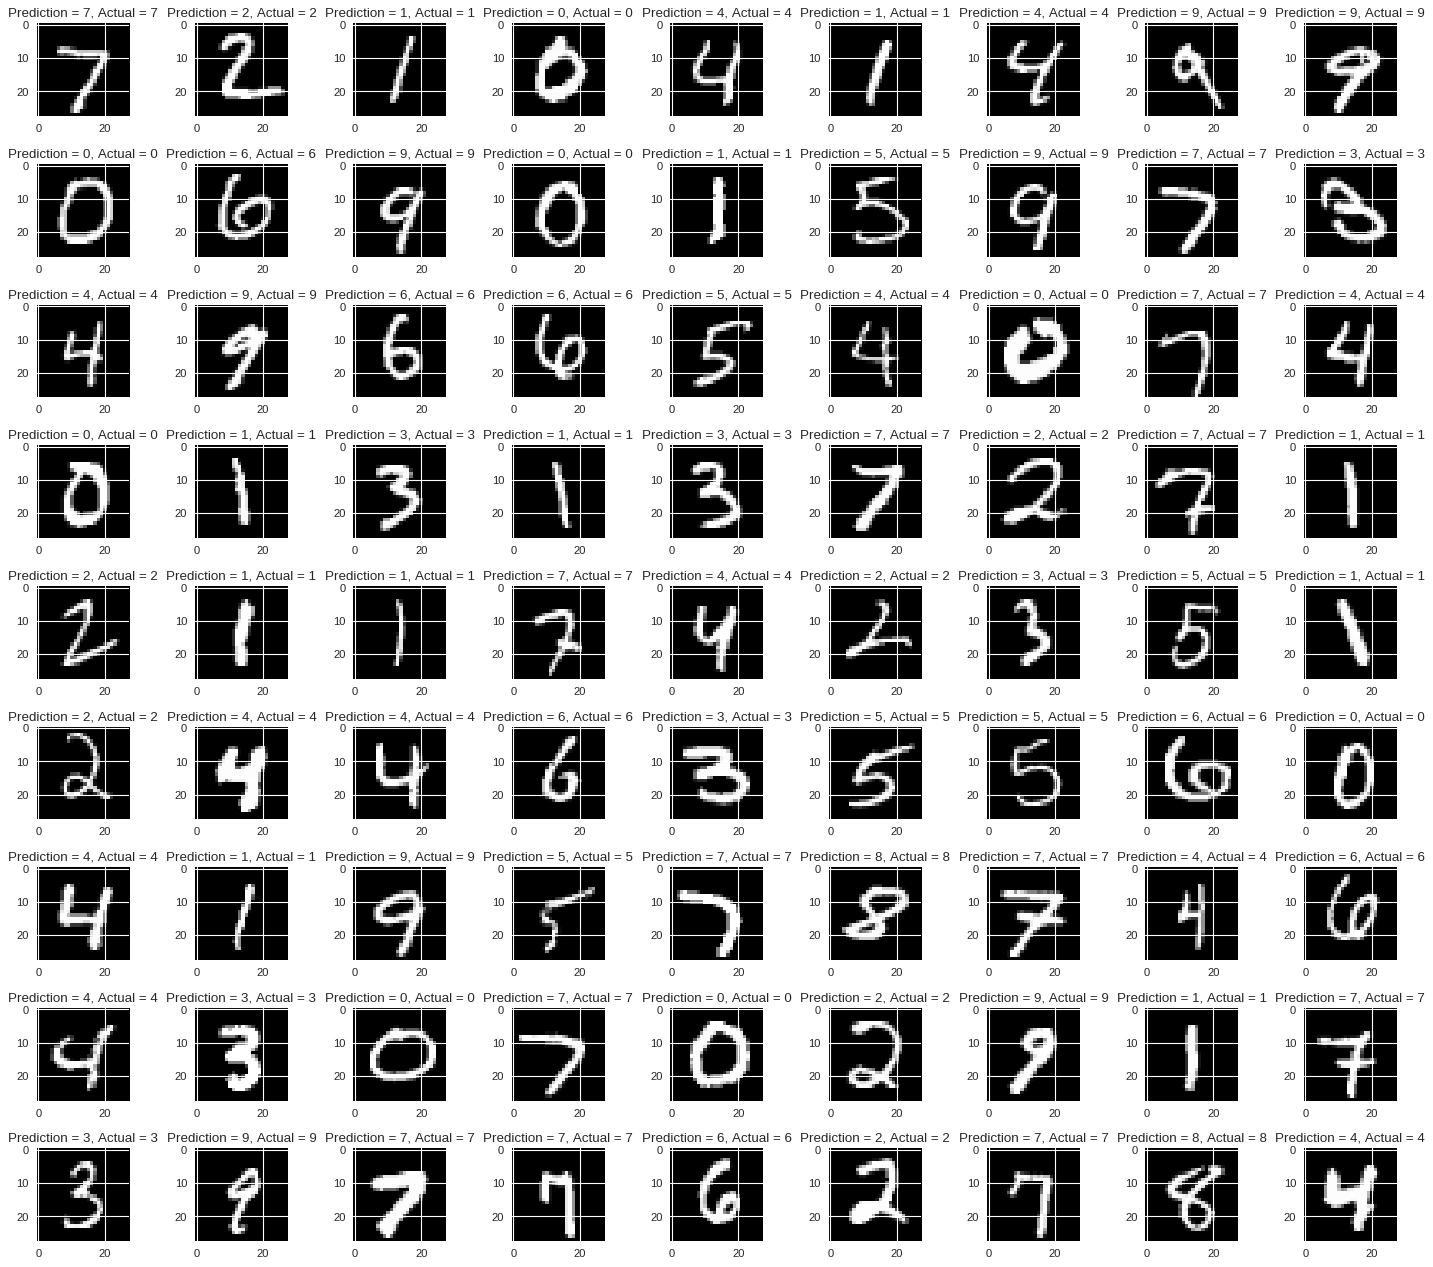

In [37]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, correct in enumerate(correct_indices[:81]):
    plt.subplot(9,9,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction = {}, Actual = {}".format(Y_pred[correct], Y_test[correct]))   

plt.tight_layout()

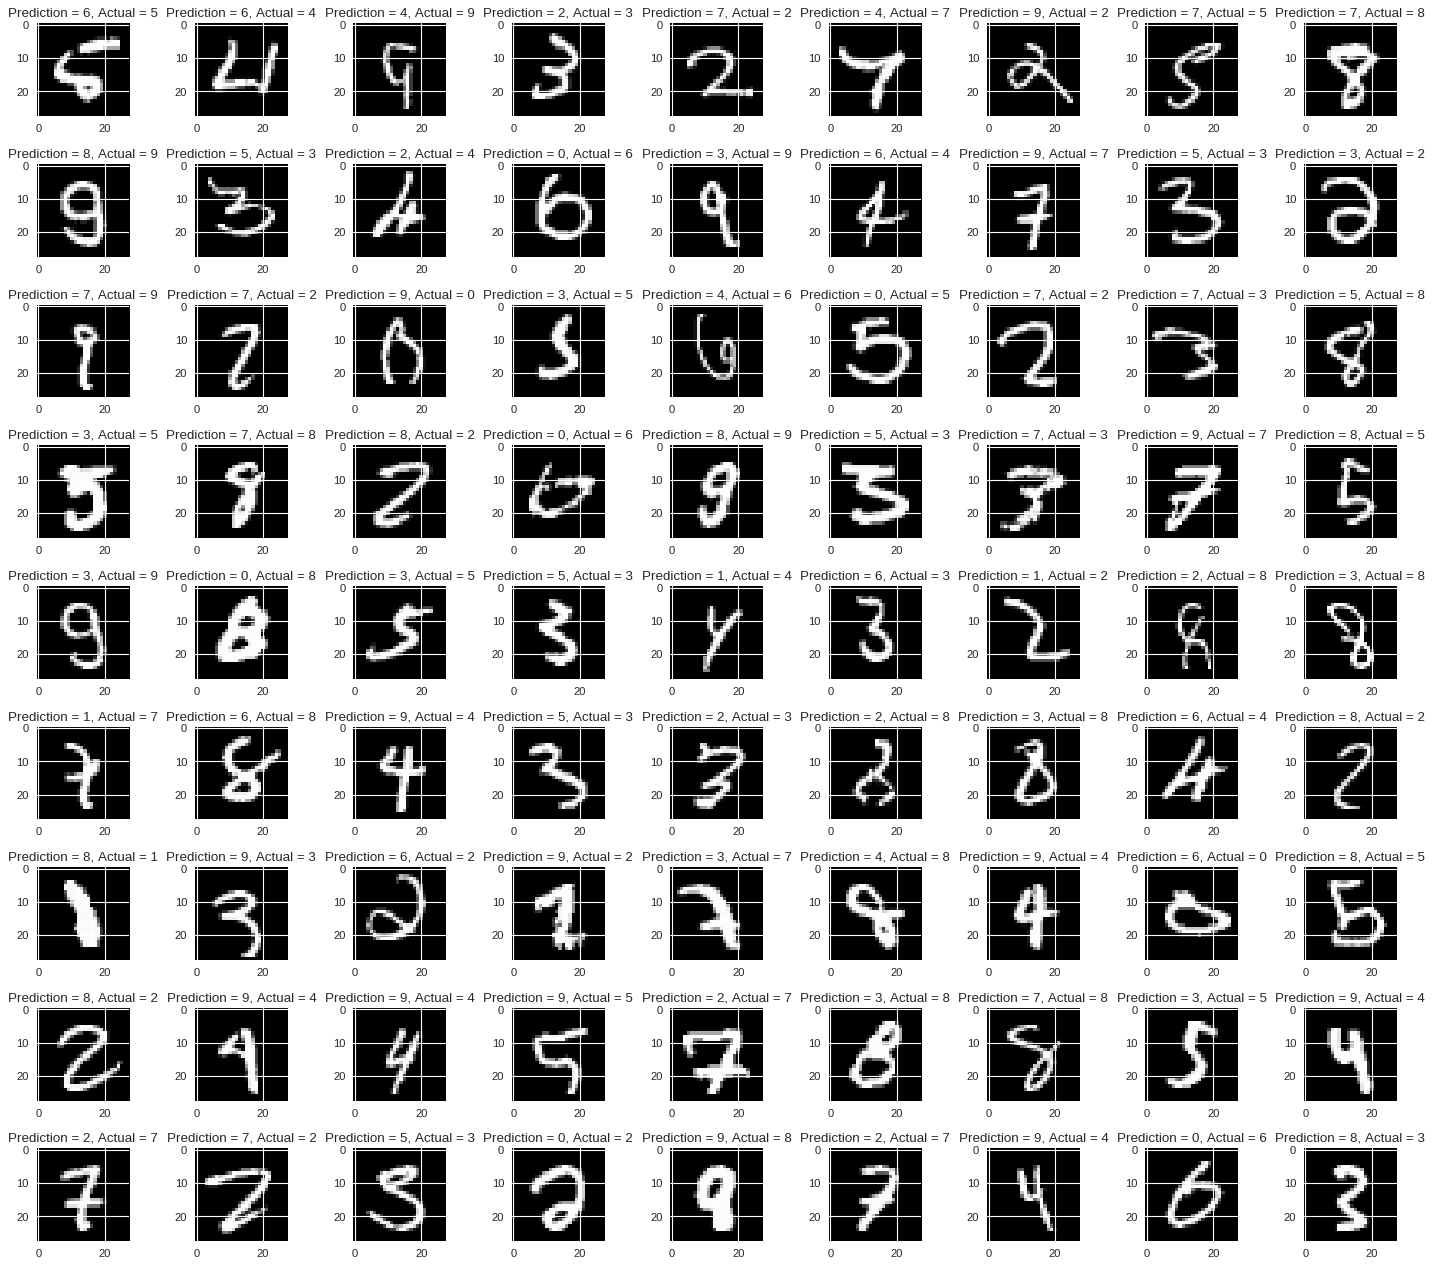

In [39]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, incorrect in enumerate(incorrect_indices[:81]):
    plt.subplot(9,9,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction = {}, Actual = {}".format(Y_pred[incorrect], Y_test[incorrect]))   

plt.tight_layout()